In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df= pd.read_csv('COVID clinical trials.csv')

# Convert Start_Date and End_Date to datetime
df['Start_Date'] = pd.to_datetime(df['Start Date'], errors='coerce', format='mixed')
df['End_Date'] = pd.to_datetime(df['Completion Date'], errors='coerce', format='mixed')

# Calculate trial duration in days and months
df['Trial_Duration_Days'] = (df['End_Date'] - df['Start_Date']).dt.days
df['Trial_Duration_Months'] = (df['Trial_Duration_Days'] / 30).round(1)

# Add a Year column for timeline analysis
df['Start_Year'] = df['Start_Date'].dt.year
df['End_Year'] = df['End_Date'].dt.year

###################################### DATA CLEANING AND WRANGLING #####################################
# Check for missing values
miss= df.isnull().sum()
print ("\nTotal missing values:\n",miss)

# Filling the missing data
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna('Unknown')
    else:
        df[col] = df[col].fillna(-1)

# Check for duplicate rows
duplicate= df.duplicated().sum()
print("\nTotal Duplicates:",duplicate)

# Drop metadata columns unlikely to be useful in summary analysis
df= df.drop (columns=['Rank', 'Other IDs', 'URL', 'Study Documents', 'Results First Posted'])

# Extract the country names
df['Country'] = df['Locations'].fillna('Unknown')

df['Country'] = df['Country'].apply(lambda x: ', '.join(sorted(set(
    [place.strip().split(',')[-1] for place in x.split('|')]
    ))) if x != 'Unknown' else 'Unknown'
)

# Save the cleaned version for Tableau dashboard
df.to_csv('Tableau_data.csv', index=False)


Total missing values:
 Rank                          0
NCT Number                    0
Title                         0
Acronym                    3303
Status                        0
Study Results                 0
Conditions                    0
Interventions               886
Outcome Measures             35
Sponsor/Collaborators         0
Gender                       10
Age                           0
Phases                     2461
Enrollment                   34
Funded Bys                    0
Study Type                    0
Study Designs                35
Other IDs                     1
Start Date                   34
Primary Completion Date      36
Completion Date              36
First Posted                  0
Results First Posted       5747
Last Update Posted            0
Locations                   585
Study Documents            5601
URL                           0
Start_Date                   34
End_Date                     36
Trial_Duration_Days          36
Trial_Duration_M

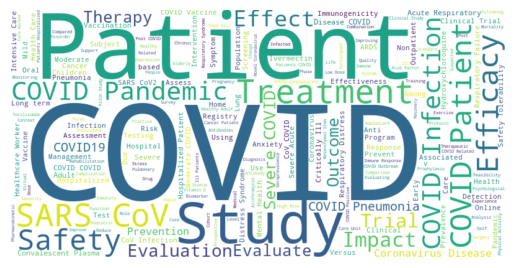

In [2]:
# Create the wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df['Title'])
wc = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

# Save and show
plt.savefig('visuals/wordcloud.png')